In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

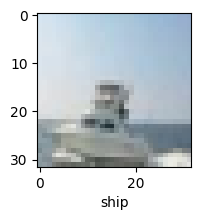

In [7]:
plot_sample(X_train, y_train, 100)


In [8]:
# Check the unique values in y_train (labels)
unique_labels = np.unique(y_train)
print("Unique labels:", unique_labels)

Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [9]:
print(X_test.shape)

(10000, 32, 32, 3)


In [10]:
from tensorflow.keras.utils import to_categorical

# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
Y_train_en = to_categorical(y_train,10)
Y_test_en = to_categorical(y_test,10)

In [11]:
# Deep and Narrow Model
def create_deep_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))
    model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])
    return model

In [12]:
#summery of Deep and Narrow Model
deep_model = create_deep_model()
deep_model.summary()
history_deep = deep_model.fit(X_train, Y_train_en, epochs = 25,batch_size=128, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                        

In [13]:
# Shallow and Wide Model
def create_wide_model():
  model = Sequential()
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [15]:
wide_model = create_wide_model()
wide_model.summary()
history_wide = wide_model.fit(X_train, Y_train_en, epochs = 25,batch_size=128, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 batch_normalization_7 (Bat  (None, 16, 16, 128)      

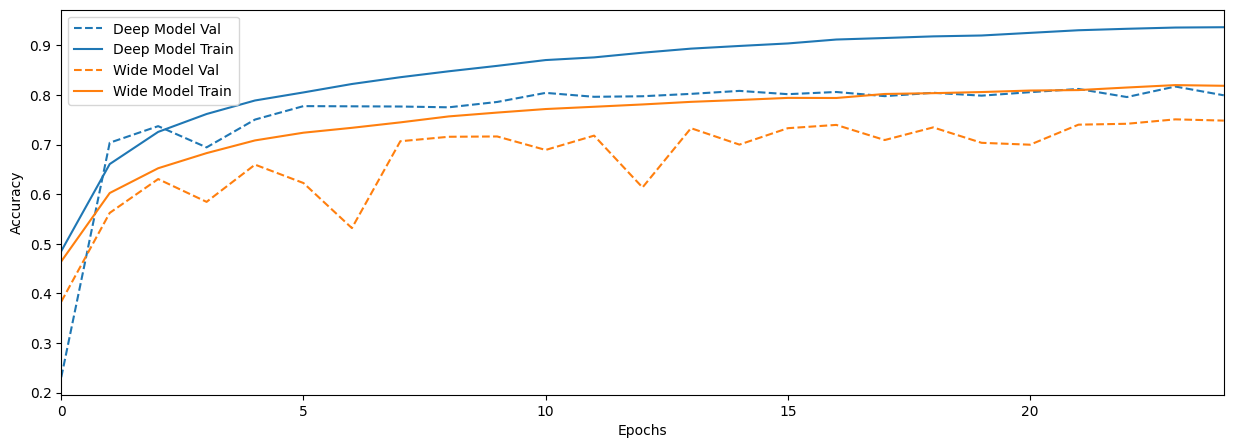

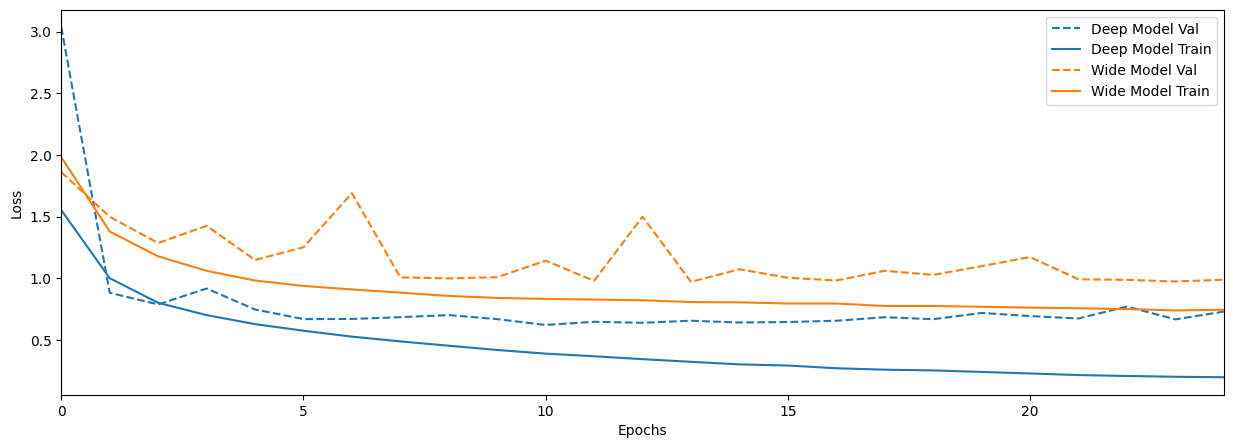

In [16]:
# Plotting function
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15,5))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

# Plot for accuracy
plot_history([('Deep Model', history_deep),
              ('Wide Model', history_wide)], key='accuracy')

# Plot for loss
plot_history([('Deep Model', history_deep),
              ('Wide Model', history_wide)], key='loss')